In [6]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
alldata = read_csv('all.csv',index_col=0)

<AxesSubplot:>

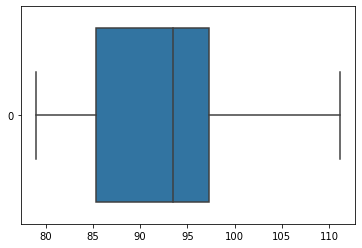

In [3]:
sns.boxplot(data=alldata['Historical Rts2 Price'],orient="h")

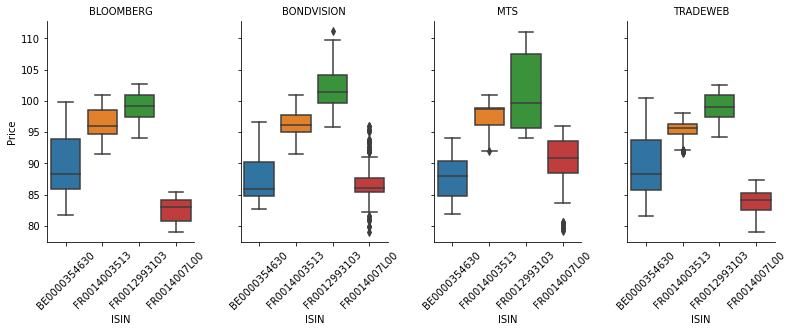

In [19]:
g = sns.catplot(x="Historical Rts2 Instrument Identification Code", y="Historical Rts2 Price",
                col="Mifid Entities Commercial Name",
                data=alldata, kind="box",
                height=4, aspect=.7);
g.set_xticklabels( rotation=45)
g.set(xlabel ="ISIN")
g.set_titles("{col_name}")
g.set(ylabel ="Price")

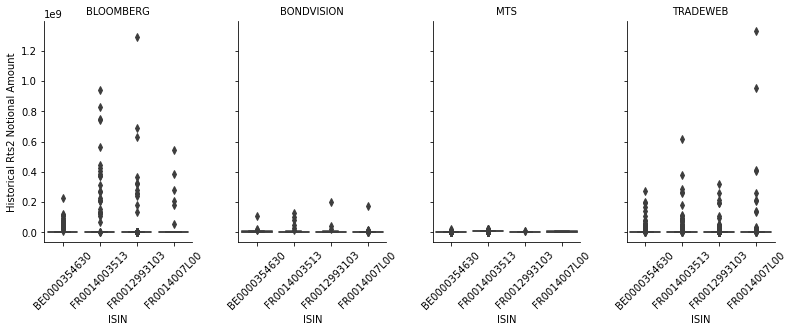

In [20]:
a = sns.catplot(x="Historical Rts2 Instrument Identification Code", y="Historical Rts2 Notional Amount",
                col="Mifid Entities Commercial Name",
                data=alldata, kind="box",
                height=4, aspect=.7);
a.set_xticklabels( rotation=45)
a.set(xlabel ="ISIN")
a.set_titles("{col_name}")
g.set(ylabel ="Notional Amount")

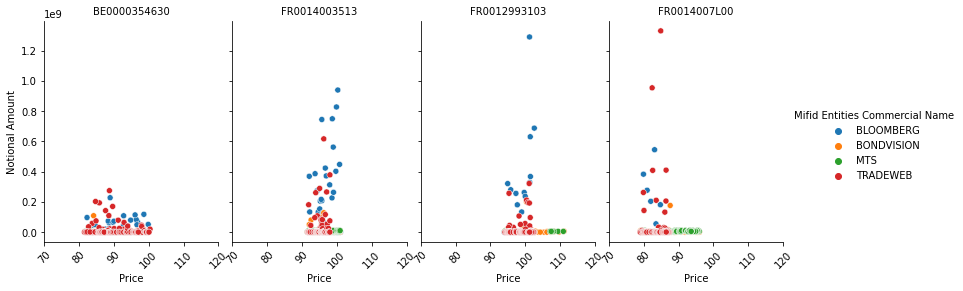

In [28]:
a = sns.relplot(x="Historical Rts2 Price", y="Historical Rts2 Notional Amount",
                col="Historical Rts2 Instrument Identification Code",
                data=alldata,kind='scatter',hue="Mifid Entities Commercial Name",
                height=4, aspect=.7);
a.set_xticklabels( rotation=45)
a.set(xlabel ="Price")
a.set_titles("{col_name}")
a.set(ylabel ="Notional Amount")

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

In [60]:
BE_bloomberg = read_csv('BE_bloomberg.csv',index_col=0)
df1 = pd.DataFrame(BE_bloomberg,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
df1 = df1.dropna()
df1 = df1.to_numpy()

In [52]:
#bloomberg=df1.loc[df1['Mifid Entities Commercial Name']=='BLOOMBERG']

In [53]:
#BE30=bloomberg.loc[bloomberg['Historical Rts2 Instrument Identification Code']=='BE0000354630']
#FR13=bloomberg.loc[bloomberg['Historical Rts2 Instrument Identification Code']=='FR0014003513']
#FR03=bloomberg.loc[bloomberg['Historical Rts2 Instrument Identification Code']=='FR0012993103']
#FR00=bloomberg.loc[bloomberg['Historical Rts2 Instrument Identification Code']=='FR0014007L00']

In [61]:

# Covariance matrix
covariance  = np.cov(df1 , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df1 , axis=0)
# Distances between center point and 
distances = []
for i, val in enumerate(df1):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df1.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])

print('--- Observations found as outlier -----')
print(df1[ distances > cutoff , :])
# [[115.  79.], [135.  84.], [122.  89.], [168.  81.]]

--- Index of Outliers ----
(array([ 53, 110, 131, 153, 167, 183, 195, 205, 222, 229, 237], dtype=int64),)
--- Observations found as outlier -----
[[8.2295602e+01 9.6670000e+07]
 [8.8929727e+01 2.2777000e+08]
 [8.8369061e+01 7.3597000e+07]
 [9.0026360e+01 7.2532170e+07]
 [9.2811868e+01 1.0830000e+08]
 [9.4820082e+01 7.9500000e+07]
 [9.6811416e+01 6.6725000e+07]
 [9.6423033e+01 8.3318000e+07]
 [9.6097807e+01 1.1400000e+08]
 [9.8621928e+01 1.1786654e+08]
 [9.9868587e+01 5.1150000e+07]]


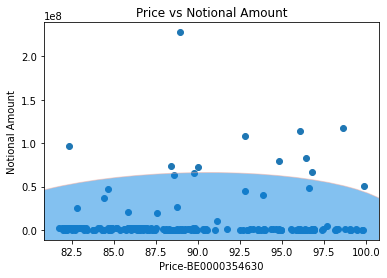

In [62]:
## Finding ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df1[: , 0], df1[ : , 1])
plt.xlabel('Price-BE0000354630')
plt.ylabel('Notional Amount')
plt.title('Price vs Notional Amount')
plt.show()

### 马氏距离

In [121]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bloomberg.csv'.format(i)))


--- Index of Outliers ----
(array([ 53, 110, 131, 153, 167, 183, 195, 205, 222, 229, 237], dtype=int64),)
--- Observations found as outlier -----
[[8.2295602e+01 9.6670000e+07]
 [8.8929727e+01 2.2777000e+08]
 [8.8369061e+01 7.3597000e+07]
 [9.0026360e+01 7.2532170e+07]
 [9.2811868e+01 1.0830000e+08]
 [9.4820082e+01 7.9500000e+07]
 [9.6811416e+01 6.6725000e+07]
 [9.6423033e+01 8.3318000e+07]
 [9.6097807e+01 1.1400000e+08]
 [9.8621928e+01 1.1786654e+08]
 [9.9868587e+01 5.1150000e+07]]


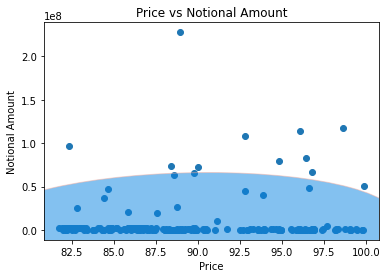

--- Index of Outliers ----
(array([ 56, 102, 122, 160, 236, 255, 273, 327, 329, 340, 345, 375, 389,
       403], dtype=int64),)
--- Observations found as outlier -----
[[9.43245790e+01 2.74290379e+08]
 [9.20538740e+01 3.69296178e+08]
 [9.37260100e+01 3.86604000e+08]
 [9.56615830e+01 7.44800000e+08]
 [9.66600670e+01 4.23650000e+08]
 [9.69290980e+01 3.71725430e+08]
 [9.79215610e+01 3.12850000e+08]
 [1.00245614e+02 9.39731690e+08]
 [9.96936060e+01 4.02551489e+08]
 [9.90141570e+01 2.63400000e+08]
 [9.89410430e+01 5.62420000e+08]
 [9.86728370e+01 7.49491000e+08]
 [9.98647550e+01 8.27679430e+08]
 [1.00762267e+02 4.47990000e+08]]


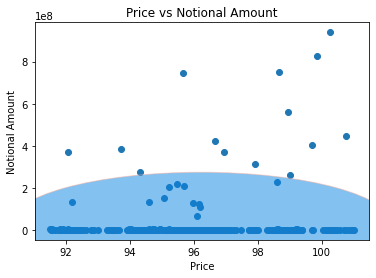

--- Index of Outliers ----
(array([ 14, 107, 145, 185, 291, 341, 369, 403, 448, 495], dtype=int64),)
--- Observations found as outlier -----
[[9.97137020e+01 2.62440000e+08]
 [9.73442030e+01 2.56227279e+08]
 [9.58613200e+01 2.80305331e+08]
 [9.49777250e+01 3.21067700e+08]
 [1.00001659e+02 2.36978000e+08]
 [1.01502416e+02 3.67697000e+08]
 [1.01452157e+02 6.30768000e+08]
 [1.01308342e+02 3.28501979e+08]
 [1.01244351e+02 1.29064732e+09]
 [1.02618255e+02 6.87784802e+08]]


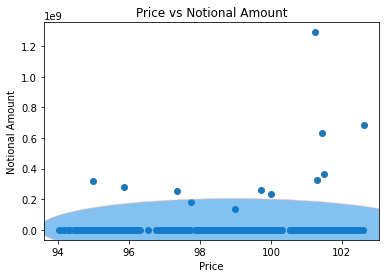

--- Index of Outliers ----
(array([ 37, 216, 303, 352, 441], dtype=int64),)
--- Observations found as outlier -----
[[8.4756778e+01 1.8137600e+08]
 [8.1999205e+01 2.0396400e+08]
 [8.0967116e+01 2.7721700e+08]
 [7.9908882e+01 3.8330520e+08]
 [8.3096504e+01 5.4489600e+08]]


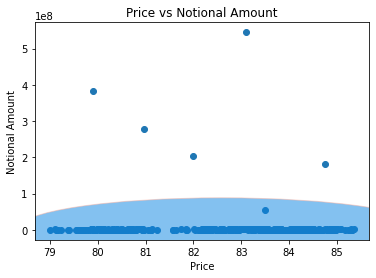

In [148]:
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    # Covariance matrix
    covariance  = np.cov(df,rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)
    # Distances between center point and 
    distances = []
    for i, val in enumerate(df):
          p1 = val
          p2 = centerpoint
          distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
          distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    print('--- Index of Outliers ----')
    print(outlierIndexes)
    # array([24, 35, 67, 81])

    print('--- Observations found as outlier -----')
    print(df[ distances > cutoff , :])
    # [[115.  79.], [135.  84.], [122.  89.], [168.  81.]]
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)

    # Ellipse patch
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                      width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
    ellipse.set_facecolor('#0984e3')
    ellipse.set_alpha(0.5)
    fig = plt.figure()
    ax = plt.subplot()
    ax.add_artist(ellipse)
    plt.scatter(df[: , 0], df[ : , 1])       
    plt.xlabel('Price')
    plt.ylabel('Notional Amount')
    plt.title('Price vs Notional Amount')
    plt.show()

--- Index of Outliers ----
(array([2], dtype=int64),)
--- Observations found as outlier -----
[[8.4188e+01 1.0860e+08]]


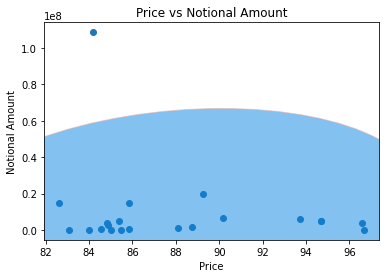

--- Index of Outliers ----
(array([ 8, 10, 23, 28], dtype=int64),)
--- Observations found as outlier -----
[[9.25690000e+01 8.00000000e+07]
 [9.20520000e+01 5.00000000e+07]
 [9.56000000e+01 1.00000000e+08]
 [9.62360937e+01 1.28000000e+08]]


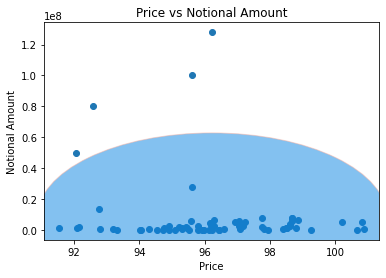

--- Index of Outliers ----
(array([13], dtype=int64),)
--- Observations found as outlier -----
[[1.00393375e+02 2.00000000e+08]]


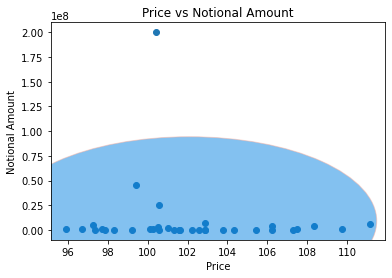

--- Index of Outliers ----
(array([  8,   9,  10, 236, 322, 323, 324, 325, 326, 327, 328, 331, 332,
       333, 334, 340], dtype=int64),)
--- Observations found as outlier -----
[[7.90640000e+01 1.00000000e+07]
 [7.99960000e+01 2.00000000e+06]
 [7.98190000e+01 6.00000000e+05]
 [8.75737156e+01 1.76500000e+08]
 [9.59090000e+01 5.00000000e+05]
 [9.54500000e+01 5.00000000e+05]
 [9.53830000e+01 3.00000000e+05]
 [9.50520000e+01 2.00000000e+05]
 [9.59260000e+01 7.00000000e+05]
 [9.53150000e+01 1.00000000e+06]
 [9.35520000e+01 1.00000000e+06]
 [9.33750000e+01 5.00000000e+05]
 [9.35740000e+01 8.00000000e+05]
 [9.34570000e+01 8.00000000e+05]
 [9.34890000e+01 5.00000000e+06]
 [9.38800000e+01 7.00000000e+05]]


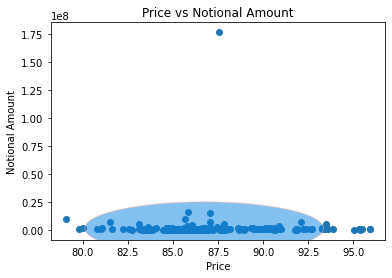

In [149]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bondvision.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    # Covariance matrix
    covariance  = np.cov(df,rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)
    # Distances between center point and 
    distances = []
    for i, val in enumerate(df):
          p1 = val
          p2 = centerpoint
          distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
          distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    print('--- Index of Outliers ----')
    print(outlierIndexes)
    # array([24, 35, 67, 81])

    print('--- Observations found as outlier -----')
    print(df[ distances > cutoff , :])
    # [[115.  79.], [135.  84.], [122.  89.], [168.  81.]]
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)

    # Ellipse patch
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                      width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
    ellipse.set_facecolor('#0984e3')
    ellipse.set_alpha(0.5)
    fig = plt.figure()
    ax = plt.subplot()
    ax.add_artist(ellipse)
    plt.scatter(df[: , 0], df[ : , 1])       
    plt.xlabel('Price')
    plt.ylabel('Notional Amount')
    plt.title('Price vs Notional Amount')
    plt.show()

--- Index of Outliers ----
(array([  5,  12,  16,  51,  52,  68,  73, 135, 149, 154, 165, 173, 179,
       182, 193, 196, 220, 256, 282, 288, 294, 296, 316, 318, 323, 328,
       336, 358, 360, 368, 370, 380, 388, 420, 422, 431, 435, 442, 455,
       461, 462, 470, 486, 487, 488], dtype=int64),)
--- Observations found as outlier -----
[[8.645e+01 1.000e+07]
 [8.653e+01 1.000e+07]
 [8.626e+01 1.000e+07]
 [8.331e+01 1.000e+07]
 [8.331e+01 1.000e+07]
 [8.248e+01 1.000e+07]
 [8.247e+01 1.000e+07]
 [8.283e+01 2.500e+07]
 [8.479e+01 1.000e+07]
 [8.475e+01 1.000e+07]
 [8.468e+01 1.000e+07]
 [8.567e+01 1.000e+07]
 [8.554e+01 1.000e+07]
 [8.547e+01 1.000e+07]
 [8.550e+01 1.000e+07]
 [8.548e+01 1.000e+07]
 [8.661e+01 1.000e+07]
 [8.857e+01 1.000e+07]
 [8.865e+01 1.000e+07]
 [8.861e+01 1.000e+07]
 [8.706e+01 1.000e+07]
 [8.706e+01 1.000e+07]
 [8.983e+01 1.000e+07]
 [8.984e+01 1.000e+07]
 [9.046e+01 1.000e+07]
 [8.995e+01 1.000e+07]
 [8.977e+01 1.000e+07]
 [8.970e+01 1.000e+07]
 [8.971e+01 1.000e+

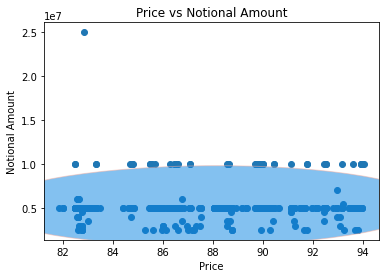

--- Index of Outliers ----
(array([  0,   3,   4,   8,  14,  15,  16,  18,  19,  20,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  42,  43,  56,  57,  71,
        74,  75,  80,  84, 212, 218, 219, 238, 243, 382], dtype=int64),)
--- Observations found as outlier -----
[[9.4290e+01 5.5000e+06]
 [9.5390e+01 5.0000e+06]
 [9.4650e+01 5.0000e+06]
 [9.2750e+01 1.4000e+07]
 [9.3610e+01 5.0000e+06]
 [9.3590e+01 5.0000e+06]
 [9.3590e+01 5.0000e+06]
 [9.3410e+01 5.0000e+06]
 [9.3380e+01 5.0000e+06]
 [9.2410e+01 2.5000e+07]
 [9.2060e+01 1.0000e+07]
 [9.2060e+01 1.0000e+07]
 [9.2300e+01 5.5000e+06]
 [9.2030e+01 1.0000e+07]
 [9.2020e+01 5.0000e+06]
 [9.2020e+01 5.0000e+06]
 [9.1900e+01 1.0000e+07]
 [9.2020e+01 1.0000e+07]
 [9.1990e+01 1.0000e+07]
 [9.1930e+01 1.0000e+07]
 [9.1930e+01 1.0000e+07]
 [9.4380e+01 5.0000e+06]
 [9.4390e+01 5.0000e+06]
 [9.5310e+01 5.0000e+06]
 [9.5310e+01 5.0000e+06]
 [9.5090e+01 5.0000e+06]
 [9.5600e+01 2.0000e+07]
 [9.5620e+01 2.0000e+07]
 [9.6280e+01 2.

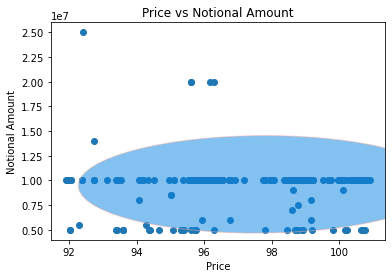

--- Index of Outliers ----
(array([5], dtype=int64),)
--- Observations found as outlier -----
[[9.433e+01 1.000e+07]]


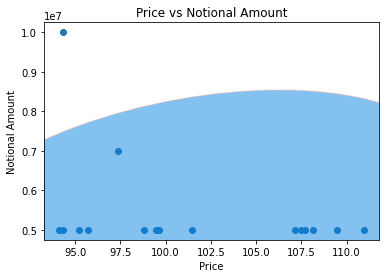

--- Index of Outliers ----
(array([ 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype=int64),)
--- Observations found as outlier -----
[[8.066e+01 5.000e+06]
 [8.067e+01 5.000e+06]
 [7.912e+01 5.000e+06]
 [7.966e+01 5.000e+06]
 [7.966e+01 1.000e+07]
 [7.954e+01 1.000e+07]
 [7.997e+01 5.000e+06]
 [8.033e+01 1.000e+07]
 [8.034e+01 1.000e+07]]


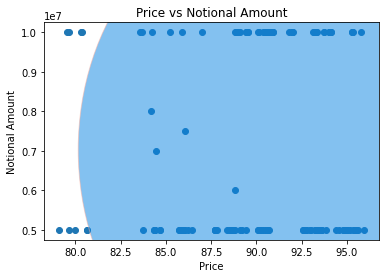

In [152]:
df_run1 = []
for i in range(1,5):
    df_run1.append(pd.read_csv('{}_mts.csv'.format(i)))
for df in df_run1:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    # Covariance matrix
    covariance  = np.cov(df,rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)
    # Distances between center point and 
    distances = []
    for i, val in enumerate(df):
          p1 = val
          p2 = centerpoint
          distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
          distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    print('--- Index of Outliers ----')
    print(outlierIndexes)
    # array([24, 35, 67, 81])

    print('--- Observations found as outlier -----')
    print(df[ distances > cutoff , :])
    # [[115.  79.], [135.  84.], [122.  89.], [168.  81.]]
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)

    # Ellipse patch
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                      width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
    ellipse.set_facecolor('#0984e3')
    ellipse.set_alpha(0.5)
    fig = plt.figure()
    ax = plt.subplot()
    ax.add_artist(ellipse)
    plt.scatter(df[: , 0], df[ : , 1])       
    plt.xlabel('Price')
    plt.ylabel('Notional Amount')
    plt.title('Price vs Notional Amount')
    plt.show()

--- Index of Outliers ----
(array([ 31,  53, 142, 160, 190, 199, 241, 266, 282], dtype=int64),)
--- Observations found as outlier -----
[[8.5836806e+01 1.9367800e+08]
 [8.4739799e+01 2.0276865e+08]
 [8.4881398e+01 7.4650000e+07]
 [8.7624012e+01 1.4230000e+08]
 [8.8723988e+01 2.7460000e+08]
 [8.8565554e+01 1.0942000e+08]
 [8.9656259e+01 1.7000000e+08]
 [9.1257266e+01 7.9000000e+07]
 [9.2929991e+01 6.4050000e+07]]


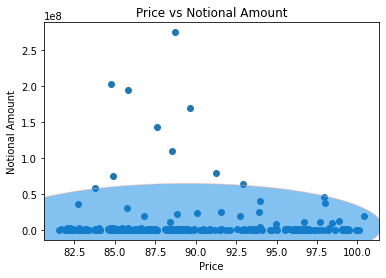

--- Index of Outliers ----
(array([ 44,  66, 125, 134, 141, 142, 143, 144, 145, 171, 291, 373, 407,
       468], dtype=int64),)
--- Observations found as outlier -----
[[9.4376108e+01 1.0778800e+08]
 [9.3915761e+01 2.6092700e+08]
 [9.1879993e+01 1.8105000e+08]
 [9.1836000e+01 1.3720000e+06]
 [9.1789000e+01 1.5678000e+04]
 [9.1636000e+01 9.1000000e+04]
 [9.1745000e+01 3.4000000e+05]
 [9.1760000e+01 5.2500000e+05]
 [9.3637022e+01 9.5775000e+07]
 [9.5034509e+01 2.8922657e+08]
 [9.6218780e+01 6.1682400e+08]
 [9.6655716e+01 1.1650300e+08]
 [9.7041696e+01 2.6563600e+08]
 [9.7985486e+01 3.7888800e+08]]


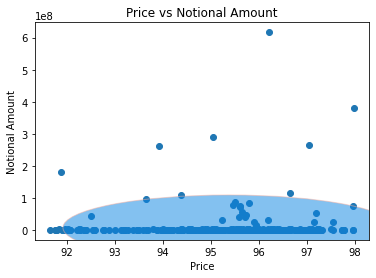

--- Index of Outliers ----
(array([199, 247, 297, 382, 410, 465, 490], dtype=int64),)
--- Observations found as outlier -----
[[9.53541950e+01 2.56792000e+08]
 [9.82307020e+01 1.06600000e+08]
 [1.00394701e+02 2.12100000e+08]
 [1.01446000e+02 9.65000000e+07]
 [1.00769819e+02 1.95940000e+08]
 [1.01141903e+02 3.21872000e+08]
 [1.01208000e+02 1.92500000e+08]]


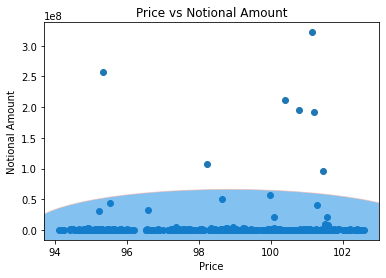

--- Index of Outliers ----
(array([ 62, 104, 207, 251, 299, 365, 464], dtype=int64),)
--- Observations found as outlier -----
[[8.35649410e+01 2.10580000e+08]
 [8.23972120e+01 9.54284000e+08]
 [7.98908500e+01 2.62410000e+08]
 [8.25565640e+01 4.08500000e+08]
 [8.48593490e+01 1.33092154e+09]
 [8.64038930e+01 4.10023163e+08]
 [8.63658870e+01 2.05699000e+08]]


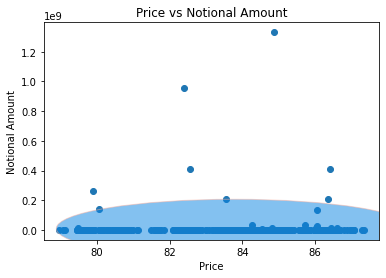

In [151]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_tradeweb.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    # Covariance matrix
    covariance  = np.cov(df,rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)
    # Distances between center point and 
    distances = []
    for i, val in enumerate(df):
          p1 = val
          p2 = centerpoint
          distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
          distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    print('--- Index of Outliers ----')
    print(outlierIndexes)
    # array([24, 35, 67, 81])

    print('--- Observations found as outlier -----')
    print(df[ distances > cutoff , :])
    # [[115.  79.], [135.  84.], [122.  89.], [168.  81.]]
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)

    # Ellipse patch
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                      width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
    ellipse.set_facecolor('#0984e3')
    ellipse.set_alpha(0.5)
    fig = plt.figure()
    ax = plt.subplot()
    ax.add_artist(ellipse)
    plt.scatter(df[: , 0], df[ : , 1])       
    plt.xlabel('Price')
    plt.ylabel('Notional Amount')
    plt.title('Price vs Notional Amount')
    plt.show()

In [ ]:
r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)

print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")

#### K-means

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to 

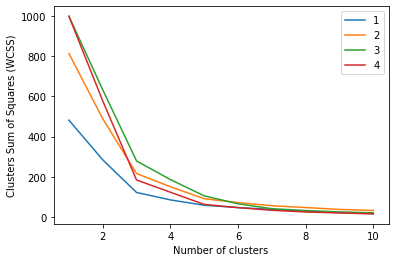

In [175]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bloomberg.csv'.format(i)))
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    customer = ss.fit_transform(df)
    from sklearn.cluster import KMeans
    wcss = []

    for j in range(1, 11):
        clustering = KMeans(n_clusters=j, init='k-means++', random_state=42)
        clustering.fit(customer)
        wcss.append(clustering.inertia_)

    ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    p=sns.lineplot(x = ks, y = wcss);
    p.set_xlabel("Number of clusters")
    p.set_ylabel("Clusters Sum of Squares (WCSS)")
    p.legend('1234')
    
   

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
110              -0.087115                         9.192397      2     5.467
237               2.057304                         1.828638      1     2.139


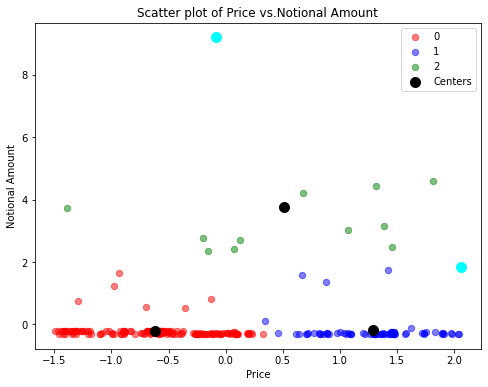

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
56               -0.827264                         2.452877      0     2.600
102              -1.818791                         3.377060      2     2.962
122              -1.088635                         3.545424      2     2.286
273               0.743396                         2.827971      2     2.262
291               1.032958                         1.987308      1     2.164
327               1.758218                         8.926056      2     4.011
340               1.220490                         2.346939      1     2.528
389               1.591912                         7.836051      2     2.924


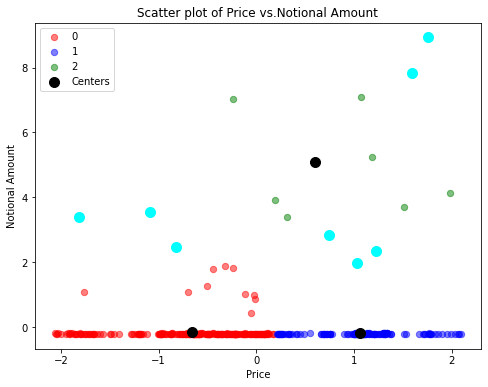

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
14                0.337778                         3.178051      2     3.263
107              -0.694321                         3.099795      0     3.192
145              -1.340230                         3.403084      0     3.446
185              -1.725103                         3.916531      0     3.986
239              -0.520539                         2.148244      0     2.311
291               0.463205                         2.857329      2     2.936
341               1.116900                         4.503879      2     4.612
369               1.095008                         7.817549      1     3.013
403               1.032366                         4.010174      2     4.112
448               1.004493                        16.129458      1     5.307
495               1.602933                         8.535738      1     2.321


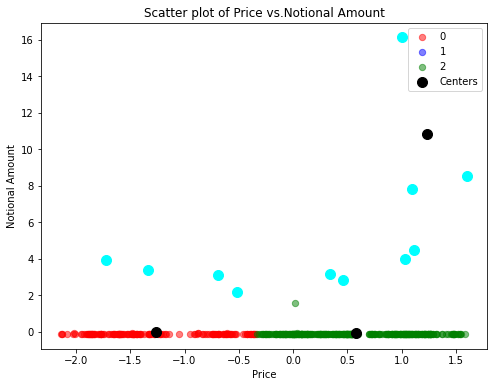

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
37                1.263086                         5.154839      2     4.263
123               0.528742                         1.474978      0     1.566
216              -0.341243                         5.812564      2     3.326
352              -1.557374                        11.034684      2     2.301
441               0.297155                        15.739941      2     6.626


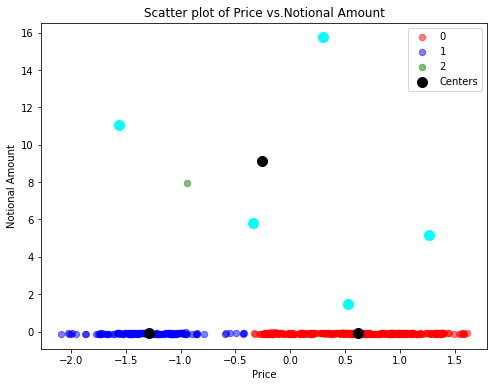

In [233]:
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    customer = ss.fit_transform(df)
    km = KMeans(n_clusters=3)
    model = km.fit(customer)

    
    def distance_from_center(price, amount, label):
        center_price =  model.cluster_centers_[label,0]
        center_amount =  model.cluster_centers_[label,1]
        distance = np.sqrt((price - center_price) ** 2 + (amount - center_amount) ** 2)
        return np.round(distance, 3)
    
    customer = pd.DataFrame(customer,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    
    customer['label'] = model.labels_
    #print(customer)
    #print(type(customer))
    customer['distance'] = distance_from_center(customer['Historical Rts2 Price'], customer['Historical Rts2 Notional Amount'], customer.label)
    
    
    outliers_out = list(customer.sort_values('distance', ascending=False).head(int(len(customer)*0.05)).index)
    outliers_o = customer[customer.index.isin(outliers_out)]
    n=sum(outliers_o['distance'] > outliers_o['distance'].mean())
    outliers_idx = list(customer.sort_values('distance', ascending=False).head(n).index)
    outliers = customer[customer.index.isin(outliers_idx)]
    print(outliers)
    
    plt.figure(figsize=(8,6))
    colors=["red","blue","green"]
    for i in range(np.max(model.labels_)+1):
        plt.scatter(customer[model.labels_==i]['Historical Rts2 Price'], customer[model.labels_==i]['Historical Rts2 Notional Amount'], label=i, c=colors[i], alpha=0.5, s=40)
    plt.scatter(outliers['Historical Rts2 Price'], outliers['Historical Rts2 Notional Amount'], c='aqua', s=100)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
    plt.title("K-Means Clustering of Customer Data",size=20)
    plt.xlabel("Price")
    plt.ylabel("Notional Amount")
    plt.title('Scatter plot of Price vs.Notional Amount')
    plt.legend()
    plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to 

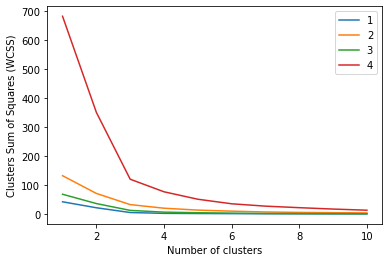

In [239]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bondvision.csv'.format(i)))
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    customer = ss.fit_transform(df)
    from sklearn.cluster import KMeans
    wcss = []

    for j in range(1, 11):
        clustering = KMeans(n_clusters=j, init='k-means++', random_state=42)
        clustering.fit(customer)
        wcss.append(clustering.inertia_)

    ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    p=sns.lineplot(x = ks, y = wcss);
    p.set_xlabel("Number of clusters")
    p.set_ylabel("Clusters Sum of Squares (WCSS)")
    p.legend('1234')
    
   

Empty DataFrame
Columns: [Historical Rts2 Price, Historical Rts2 Notional Amount, label, distance]
Index: []


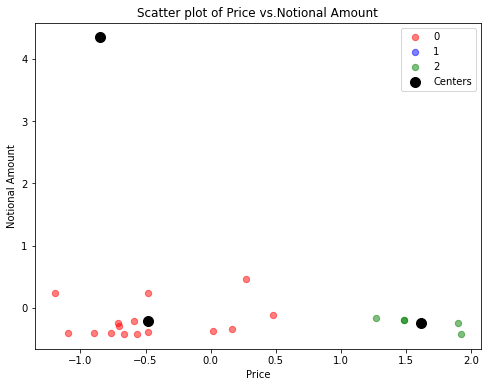

    Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
10              -1.896971                         1.891227      2     2.007
28               0.002181                         5.395949      2     1.980


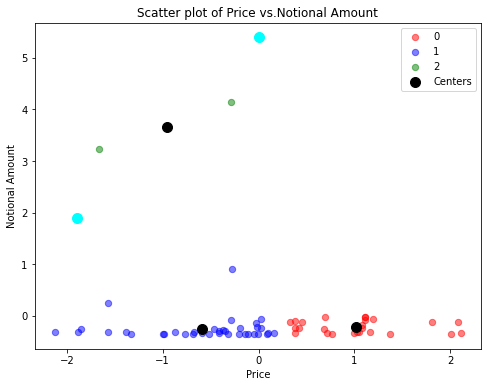

Empty DataFrame
Columns: [Historical Rts2 Price, Historical Rts2 Notional Amount, label, distance]
Index: []


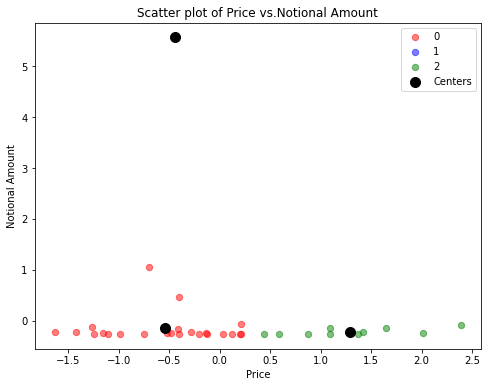

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
5                -2.114458                        -0.088772      0     1.717
6                -2.201211                        -0.092199      0     1.804
8                -2.840741                         0.884929      0     2.619
9                -2.495209                         0.054038      0     2.101
10               -2.560831                        -0.091368      0     2.164
326               3.410702                        -0.080982      2     1.702


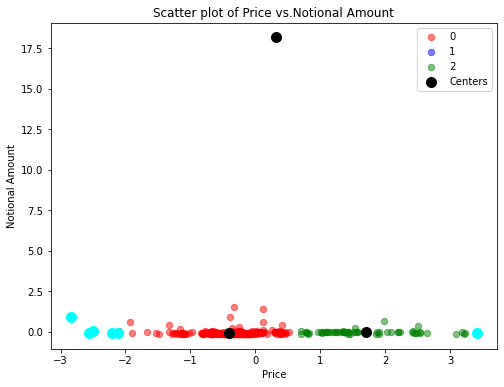

In [240]:
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    customer = ss.fit_transform(df)
    km = KMeans(n_clusters=3)
    model = km.fit(customer)

    
    def distance_from_center(price, amount, label):
        center_price =  model.cluster_centers_[label,0]
        center_amount =  model.cluster_centers_[label,1]
        distance = np.sqrt((price - center_price) ** 2 + (amount - center_amount) ** 2)
        return np.round(distance, 3)
    
    customer = pd.DataFrame(customer,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    
    customer['label'] = model.labels_
    #print(customer)
    #print(type(customer))
    customer['distance'] = distance_from_center(customer['Historical Rts2 Price'], customer['Historical Rts2 Notional Amount'], customer.label)
    
    
    outliers_out = list(customer.sort_values('distance', ascending=False).head(int(len(customer)*0.05)).index)
    outliers_o = customer[customer.index.isin(outliers_out)]
    n=sum(outliers_o['distance'] > outliers_o['distance'].mean())
    outliers_idx = list(customer.sort_values('distance', ascending=False).head(n).index)
    outliers = customer[customer.index.isin(outliers_idx)]
    print(outliers)
    
    plt.figure(figsize=(8,6))
    colors=["red","blue","green"]
    for i in range(np.max(model.labels_)+1):
        plt.scatter(customer[model.labels_==i]['Historical Rts2 Price'], customer[model.labels_==i]['Historical Rts2 Notional Amount'], label=i, c=colors[i], alpha=0.5, s=40)
    plt.scatter(outliers['Historical Rts2 Price'], outliers['Historical Rts2 Notional Amount'], c='aqua', s=100)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
    plt.title("K-Means Clustering of Customer Data",size=20)
    plt.xlabel("Price")
    plt.ylabel("Notional Amount")
    plt.title('Scatter plot of Price vs.Notional Amount')
    plt.legend()
    plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to 

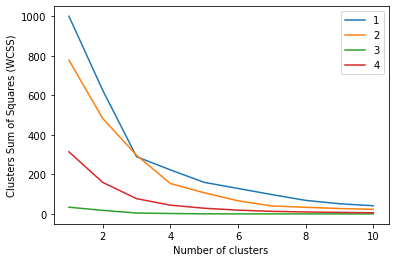

In [241]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_mts.csv'.format(i)))
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    customer = ss.fit_transform(df)
    from sklearn.cluster import KMeans
    wcss = []

    for j in range(1, 11):
        clustering = KMeans(n_clusters=j, init='k-means++', random_state=42)
        clustering.fit(customer)
        wcss.append(clustering.inertia_)

    ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    p=sns.lineplot(x = ks, y = wcss);
    p.set_xlabel("Number of clusters")
    p.set_ylabel("Clusters Sum of Squares (WCSS)")
    p.legend('1234')
    
   

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
68               -1.481146                         2.552371      2     1.732
73               -1.483926                         2.552371      2     1.735
135              -1.383844                        10.643151      2     8.076


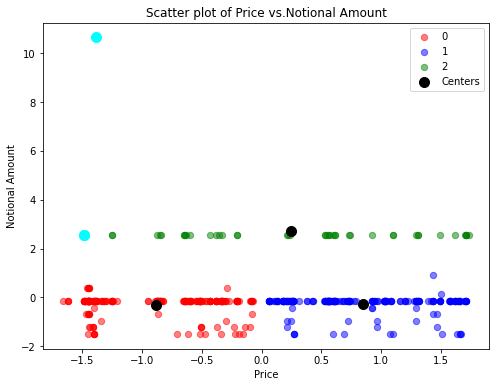

    Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
20              -2.387850                         7.647577      2     7.340
74              -0.939047                         5.162897      2     4.745
75              -0.929964                         5.162897      2     4.745
80              -0.630211                         5.162897      2     4.766
84              -0.684711                         5.162897      2     4.761


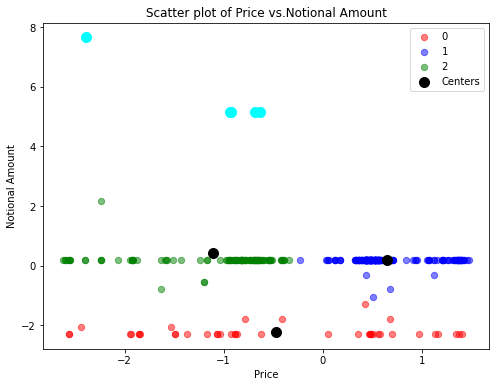

Empty DataFrame
Columns: [Historical Rts2 Price, Historical Rts2 Notional Amount, label, distance]
Index: []


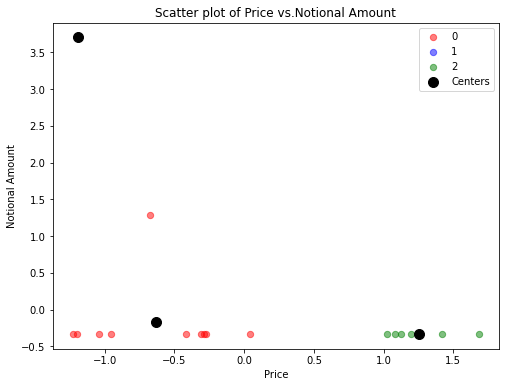

    Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
13              -2.575583                         1.224722      2     1.858
14              -2.604399                         1.224722      2     1.875
16              -2.414694                         1.224722      2     1.770
17              -2.412293                         1.224722      2     1.769


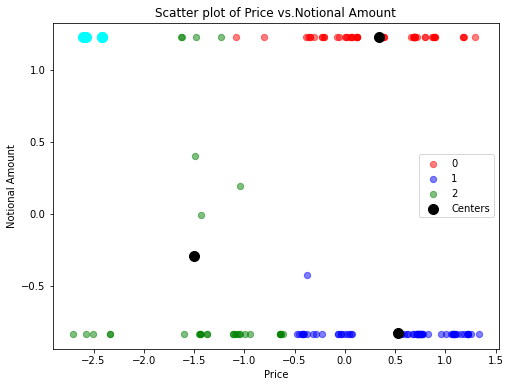

In [242]:
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    customer = ss.fit_transform(df)
    km = KMeans(n_clusters=3)
    model = km.fit(customer)

    
    def distance_from_center(price, amount, label):
        center_price =  model.cluster_centers_[label,0]
        center_amount =  model.cluster_centers_[label,1]
        distance = np.sqrt((price - center_price) ** 2 + (amount - center_amount) ** 2)
        return np.round(distance, 3)
    
    customer = pd.DataFrame(customer,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    
    customer['label'] = model.labels_
    #print(customer)
    #print(type(customer))
    customer['distance'] = distance_from_center(customer['Historical Rts2 Price'], customer['Historical Rts2 Notional Amount'], customer.label)
    
    
    outliers_out = list(customer.sort_values('distance', ascending=False).head(int(len(customer)*0.05)).index)
    outliers_o = customer[customer.index.isin(outliers_out)]
    n=sum(outliers_o['distance'] > outliers_o['distance'].mean())
    outliers_idx = list(customer.sort_values('distance', ascending=False).head(n).index)
    outliers = customer[customer.index.isin(outliers_idx)]
    print(outliers)
    
    plt.figure(figsize=(8,6))
    colors=["red","blue","green"]
    for i in range(np.max(model.labels_)+1):
        plt.scatter(customer[model.labels_==i]['Historical Rts2 Price'], customer[model.labels_==i]['Historical Rts2 Notional Amount'], label=i, c=colors[i], alpha=0.5, s=40)
    plt.scatter(outliers['Historical Rts2 Price'], outliers['Historical Rts2 Notional Amount'], c='aqua', s=100)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
    plt.title("K-Means Clustering of Customer Data",size=20)
    plt.xlabel("Price")
    plt.ylabel("Notional Amount")
    plt.title('Scatter plot of Price vs.Notional Amount')
    plt.legend()
    plt.show()

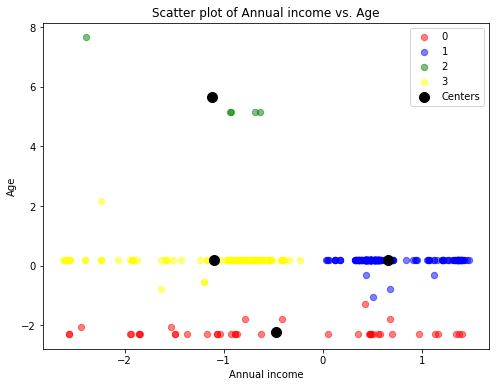

In [249]:
dataset = read_csv('2_mts.csv',index_col=0)
df = pd.DataFrame(dataset,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
df = df.dropna()
df = df.to_numpy()
ss = StandardScaler()
#dff=ss.fit_transform(df)
customer = pd.DataFrame(ss.fit_transform(df), columns=[ 'Historical Rts2 Price','Historical Rts2 Notional Amount'])
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(customer)

colors=["red","blue","green",'yellow']
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(customer[model.labels_==i]['Historical Rts2 Price'], customer[model.labels_==i]['Historical Rts2 Notional Amount'], label=i, c = colors[i],  alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Customer Data",size=20)
plt.xlabel("Price")
plt.ylabel("Notional Amount")
plt.title('Scatter plot of Price vs.Notional Amount')
plt.legend()
plt.show()

def distance_from_center(price, amount, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
:param float income: the standardized income of the data point 
    :param float age: the standardized age of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    center_price =  model.cluster_centers_[label,0]
    center_amount =  model.cluster_centers_[label,1]
    distance = np.sqrt((price - center_price) ** 2 + (amount - center_amount) ** 2)
    return np.round(distance, 3)
customer['label'] = model.labels_
customer['distance'] = distance_from_center(customer['Historical Rts2 Price'], customer['Historical Rts2 Notional Amount'], customer.label)


In [253]:
outliers_idx = list(customer.sort_values('distance', ascending=False).head(8).index)
outliers = customer[customer.index.isin(outliers_idx)]
print(outliers)

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
8                -2.233433                         2.181281      3     2.294
20               -2.387850                         7.647577      2     2.361
24               -2.437809                        -2.042675      0     1.971
26               -2.564977                        -2.291143      0     2.092
27               -2.564977                        -2.291143      0     2.092
238               1.377222                        -2.291143      0     1.853
243               1.404472                        -2.291143      0     1.880
382               1.349972                        -2.291143      0     1.826


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to 

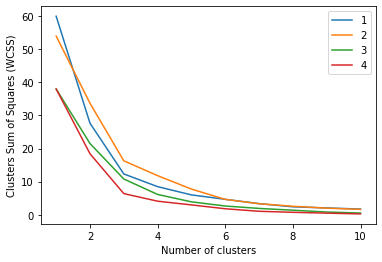

In [254]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_tradeweb.csv'.format(i)))
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    customer = ss.fit_transform(df)
    from sklearn.cluster import KMeans
    wcss = []

    for j in range(1, 11):
        clustering = KMeans(n_clusters=j, init='k-means++', random_state=42)
        clustering.fit(customer)
        wcss.append(clustering.inertia_)

    ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    p=sns.lineplot(x = ks, y = wcss);
    p.set_xlabel("Number of clusters")
    p.set_ylabel("Clusters Sum of Squares (WCSS)")
    p.legend('1234')
    
   

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
111              -1.165090                         2.180116      0     2.385
142              -0.941353                         2.865255      0     3.023
190              -0.157616                        11.078292      2     3.806
199              -0.189930                         4.293449      2     2.994
266               0.359073                         3.043933      1     3.235
282               0.700243                         2.429855      1     2.553


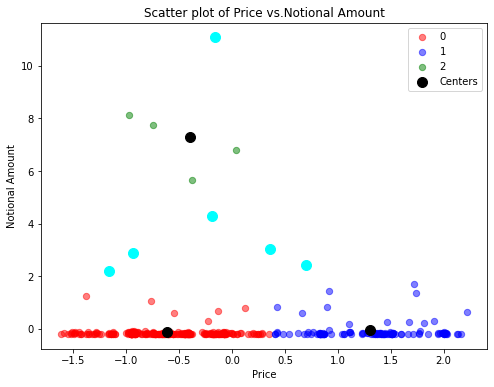

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
44               -0.695852                         2.419688      1     2.578
66               -1.017677                         6.099775      2     2.853
125              -2.440863                         4.180249      1     4.400
145              -1.212540                         2.131004      1     2.212
291               0.592343                        14.652345      2     6.118
373               0.897801                         2.629119      0     2.752
407               1.167636                         6.212938      2     2.426
486               1.817304                         1.631759      0     2.176


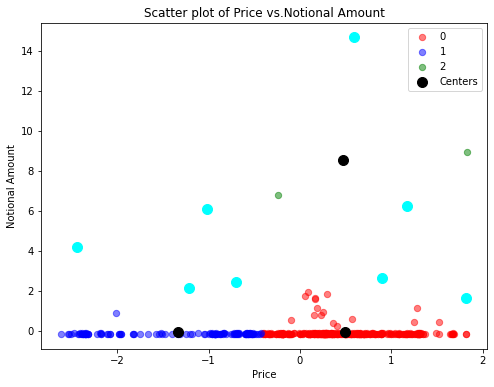

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
14                0.507010                         2.091229      0     2.194
40               -0.088518                         1.857249      0     2.089
152              -1.473642                         1.604205      1     1.730
199              -1.549324                         9.967611      2     2.134
247              -0.268467                         4.049567      1     4.221
365               1.095565                         1.476539      0     1.638
382               1.163248                         3.651595      0     3.785
410               0.862157                         7.569848      2     1.634
465               1.027839                        12.531970      2     3.444
490               1.057271                         7.434301      2     1.823


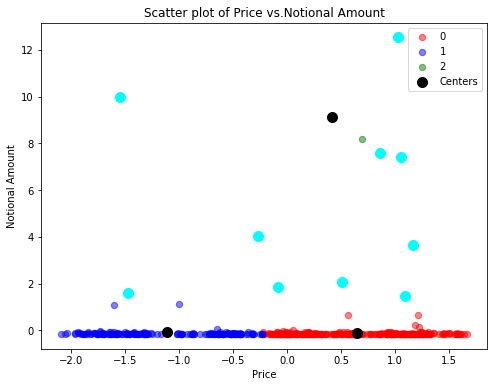

     Historical Rts2 Price  Historical Rts2 Notional Amount  label  distance
62               -0.102743                         2.503326      0     2.668
104              -0.664591                        11.744071      1     2.414
164              -1.791312                         1.667446      2     1.829
207              -1.870518                         3.147330      2     3.273
251              -0.587920                         4.962542      2     5.040
299               0.520056                        16.423905      1     2.414
365               1.263207                         4.981467      0     5.086
464               1.244921                         2.442679      0     2.583


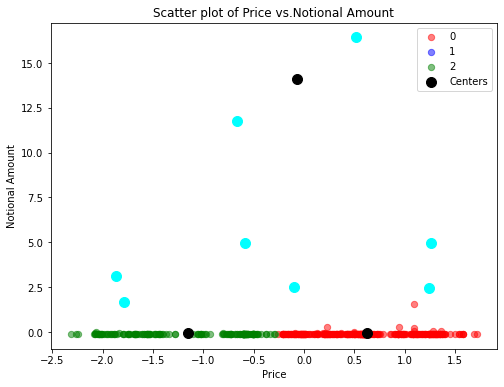

In [256]:
for df in df_run:

    ss = StandardScaler()
#dff=ss.fit_transform(df)
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    customer = ss.fit_transform(df)
    km = KMeans(n_clusters=3)
    model = km.fit(customer)

    
    def distance_from_center(price, amount, label):
        center_price =  model.cluster_centers_[label,0]
        center_amount =  model.cluster_centers_[label,1]
        distance = np.sqrt((price - center_price) ** 2 + (amount - center_amount) ** 2)
        return np.round(distance, 3)
    
    customer = pd.DataFrame(customer,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    
    customer['label'] = model.labels_
    #print(customer)
    #print(type(customer))
    customer['distance'] = distance_from_center(customer['Historical Rts2 Price'], customer['Historical Rts2 Notional Amount'], customer.label)
    
    
    outliers_out = list(customer.sort_values('distance', ascending=False).head(int(len(customer)*0.05)).index)
    outliers_o = customer[customer.index.isin(outliers_out)]
    n=sum(outliers_o['distance'] > outliers_o['distance'].mean())
    outliers_idx = list(customer.sort_values('distance', ascending=False).head(n).index)
    outliers = customer[customer.index.isin(outliers_idx)]
    print(outliers)
    
    plt.figure(figsize=(8,6))
    colors=["red","blue","green"]
    for i in range(np.max(model.labels_)+1):
        plt.scatter(customer[model.labels_==i]['Historical Rts2 Price'], customer[model.labels_==i]['Historical Rts2 Notional Amount'], label=i, c=colors[i], alpha=0.5, s=40)
    plt.scatter(outliers['Historical Rts2 Price'], outliers['Historical Rts2 Notional Amount'], c='aqua', s=100)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
    plt.title("K-Means Clustering of Customer Data",size=20)
    plt.xlabel("Price")
    plt.ylabel("Notional Amount")
    plt.title('Scatter plot of Price vs.Notional Amount')
    plt.legend()
    plt.show()

#### LOF

In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

-7.233810019562496
(array([ 20,  92, 134], dtype=int64),)
3


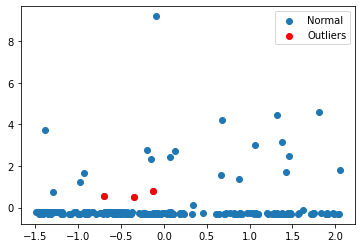

-2.761375580978584
(array([ 20,  26,  40,  53,  71,  92, 110, 134, 162, 178, 195, 226, 237],
      dtype=int64),)
13


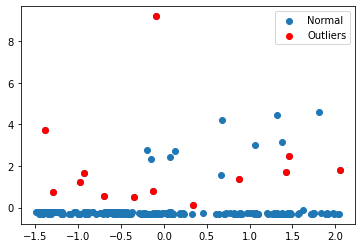

-11.696038714150525
(array([ 42, 139, 184, 221, 291], dtype=int64),)
5


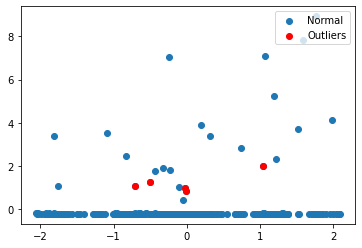

-2.1602787825875285
(array([ 18,  42,  56,  83, 102, 139, 155, 184, 195, 205, 221, 229, 291,
       292, 293, 302, 323, 324, 327, 340, 389], dtype=int64),)
21


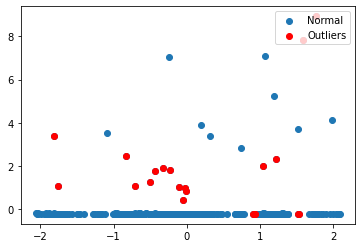

-43.547268042232076
(array([341, 369, 403, 448, 495], dtype=int64),)
5


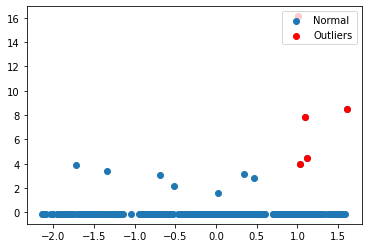

-1.3871231862046058
(array([ 14,  59,  65, 107, 145, 146, 163, 185, 210, 211, 212, 213, 214,
       215, 216, 239, 255, 291, 341, 369, 403, 415, 416, 448, 495],
      dtype=int64),)
25


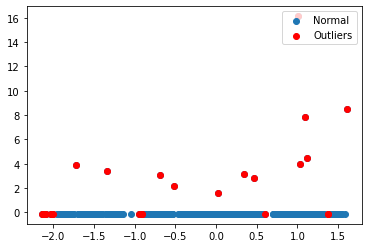

-44.26047658627146
(array([ 37, 216, 303, 352, 441], dtype=int64),)
5


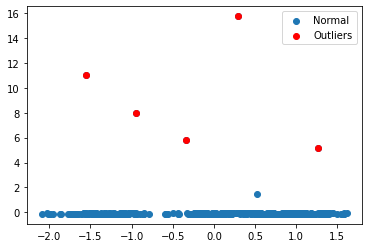

-1.657012887576771
(array([ 37,  59,  60, 113, 114, 115, 119, 120, 121, 123, 216, 293, 303,
       304, 305, 306, 307, 308, 309, 352, 375, 376, 378, 441, 477],
      dtype=int64),)
25


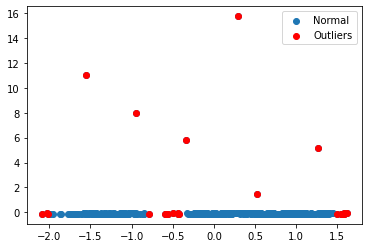

In [265]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bloomberg.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:
        model = LocalOutlierFactor(n_neighbors=20, contamination=i)
        model.fit_predict(df)
        lof = model.negative_outlier_factor_ 
        thresh = quantile(lof, i)
        print(thresh)
        index = where(lof<=thresh)
        print(index)
        print(len(index[0]))
        values = df[index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='r', label="Outliers")
        plt.legend(loc="upper right") 
        plt.show()

        '''y_pred = model.fit_predict(df)
        n_errors = (y_pred != 1).sum() 
        lofs_index = np.where(y_pred!=1) 
        print(lofs_index)
        print(n_errors)'''

-1.0079395798171158
(array([13], dtype=int64),)
1


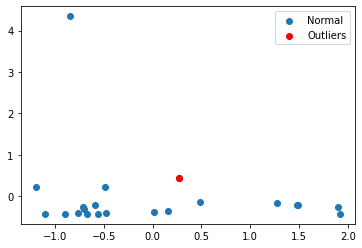

-1.007286319096254
(array([ 9, 13], dtype=int64),)
2


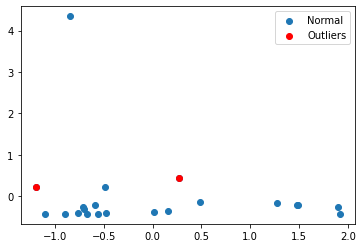

-7.312176728021923
(array([28], dtype=int64),)
1


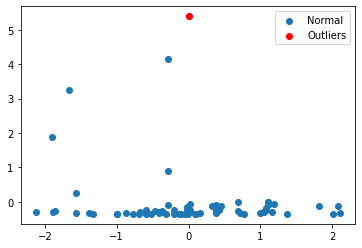

-3.1033039215744305
(array([ 8, 10, 23, 28], dtype=int64),)
4


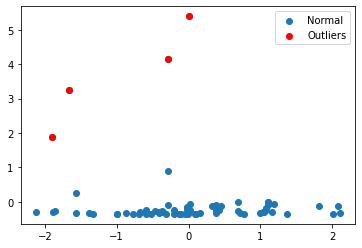

-3.9224456294277616
(array([13], dtype=int64),)
1


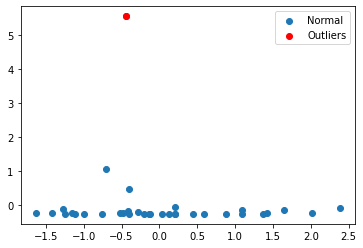

-1.6119237012373175
(array([13, 30], dtype=int64),)
2


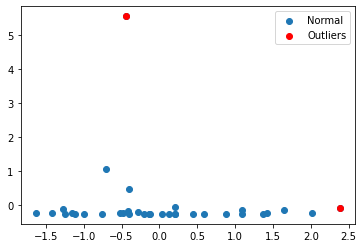

-5.1689661431262115
(array([ 18, 178, 236, 266], dtype=int64),)
4


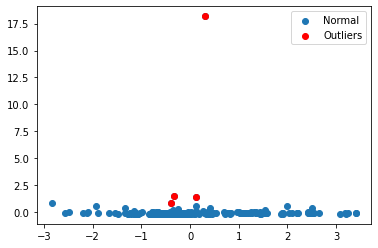

-1.9355190232520614
(array([  1,   5,   6,   7,   8,   9,  10,  11,  18,  97,  98, 119, 159,
       178, 212, 236, 263, 266], dtype=int64),)
18


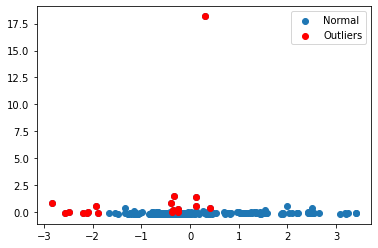

In [266]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bondvision.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:
        model = LocalOutlierFactor(n_neighbors=20, contamination=i)
        model.fit_predict(df)
        lof = model.negative_outlier_factor_ 
        thresh = quantile(lof, i)
        print(thresh)
        index = where(lof<=thresh)
        print(index)
        print(len(index[0]))
        values = df[index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='r', label="Outliers")
        plt.legend(loc="upper right") 
        plt.show()

        '''y_pred = model.fit_predict(df)
        n_errors = (y_pred != 1).sum() 
        lofs_index = np.where(y_pred!=1) 
        print(lofs_index)
        print(n_errors)'''

-35.60707626205969
(array([ 77, 105, 107, 109, 111], dtype=int64),)
5


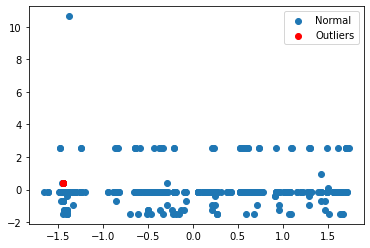

-3.5966532827431315
(array([ 23,  64,  76,  77,  79,  89, 102, 104, 105, 106, 107, 108, 109,
       111, 120, 129, 130, 131, 135, 171, 240, 309, 444, 450, 452],
      dtype=int64),)
25


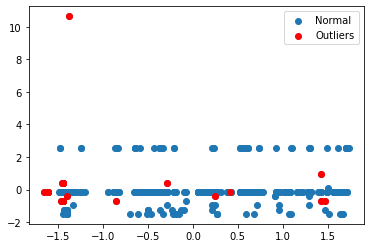

-41.82853864630353
(array([ 80,  84, 184, 264], dtype=int64),)
4


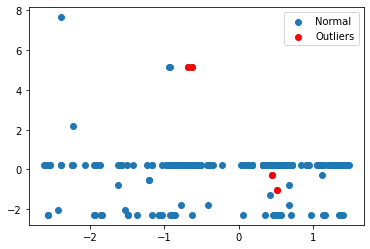

-2.8268824989367283
(array([  8,  20,  66,  67,  74,  75,  80,  84, 142, 144, 145, 147, 148,
       151, 152, 153, 184, 216, 264, 273], dtype=int64),)
20


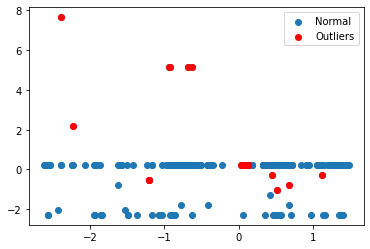

-1.0194160304260909
(array([9], dtype=int64),)
1


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


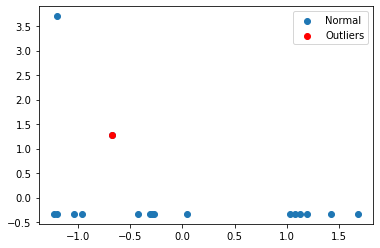

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


-1.0077414324594998
(array([9], dtype=int64),)
1


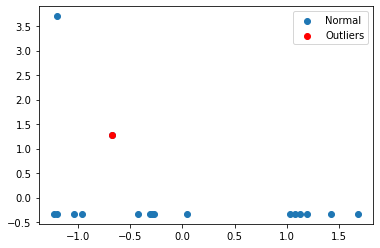

-2.158186593411759
(array([ 5, 97], dtype=int64),)
2


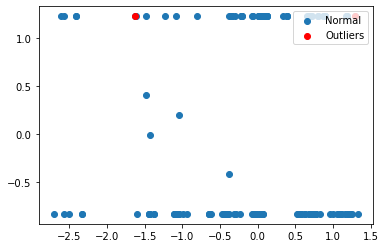

-1.9410545025929893
(array([ 4,  5, 16, 17, 19, 21, 31, 97], dtype=int64),)
8


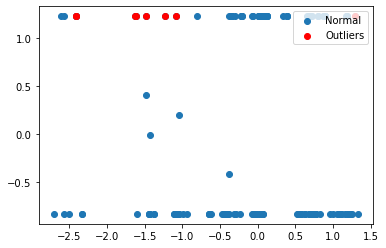

In [7]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_mts.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:
        model = LocalOutlierFactor(n_neighbors=20, contamination=i)
        model.fit_predict(df)
        lof = model.negative_outlier_factor_ 
        thresh = quantile(lof, i)
        print(thresh)
        index = where(lof<=thresh)
        print(index)
        print(len(index[0]))
        values = df[index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='r', label="Outliers")
        plt.legend(loc="upper right") 
        plt.show()

        '''y_pred = model.fit_predict(df)
        n_errors = (y_pred != 1).sum() 
        lofs_index = np.where(y_pred!=1) 
        print(lofs_index)
        print(n_errors)'''

-9.005795648637966
(array([ 10, 111, 153, 211], dtype=int64),)
4


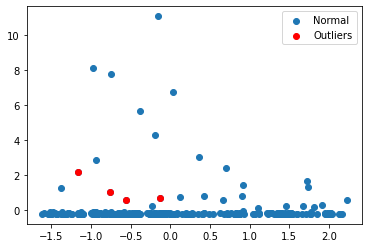

-3.5687011646883233
(array([ 10,  31,  53, 111, 125, 142, 153, 190, 211, 226, 241, 260, 272,
       276, 312, 313, 320, 327, 331, 361], dtype=int64),)
20


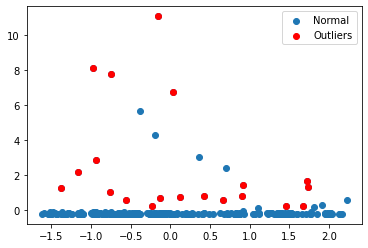

-11.298258834206901
(array([223, 290, 297, 410, 470], dtype=int64),)
5


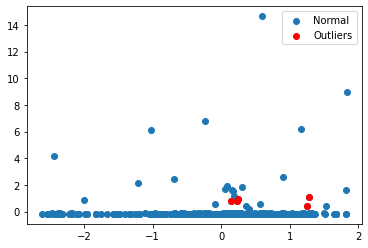

-4.12948944177188
(array([ 23, 103, 125, 145, 202, 214, 223, 235, 257, 267, 284, 287, 290,
       291, 297, 338, 362, 410, 468, 470, 473, 477, 480, 484, 485],
      dtype=int64),)
25


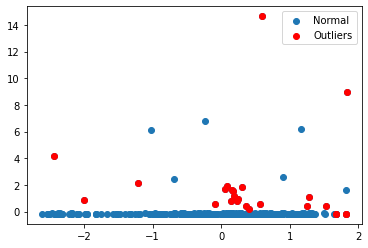

-17.91300471563583
(array([199, 382, 410, 465, 490], dtype=int64),)
5


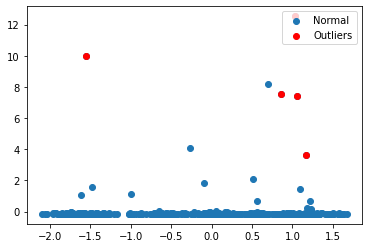

-1.5978942625583414
(array([ 14,  19,  40,  70,  75,  89, 152, 199, 208, 223, 236, 247, 269,
       289, 297, 300, 336, 365, 370, 382, 383, 410, 465, 474, 490],
      dtype=int64),)
25


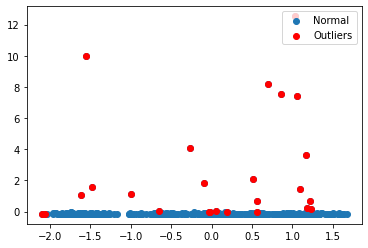

-29.400256709485355
(array([ 62, 104, 251, 299, 365], dtype=int64),)
5


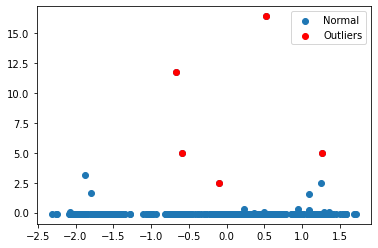

-2.0797608881667764
(array([ 18,  62, 104, 164, 207, 224, 251, 299, 365, 374, 393, 400, 413,
       422, 426, 432, 438, 441, 442, 443, 444, 445, 446, 464, 467],
      dtype=int64),)
25


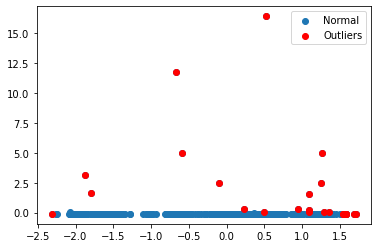

In [268]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_tradeweb.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:
        model = LocalOutlierFactor(n_neighbors=20, contamination=i)
        model.fit_predict(df)
        lof = model.negative_outlier_factor_ 
        thresh = quantile(lof, i)
        print(thresh)
        index = where(lof<=thresh)
        print(index)
        print(len(index[0]))
        values = df[index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='r', label="Outliers")
        plt.legend(loc="upper right") 
        plt.show()

        '''y_pred = model.fit_predict(df)
        n_errors = (y_pred != 1).sum() 
        lofs_index = np.where(y_pred!=1) 
        print(lofs_index)
        print(n_errors)'''

#### isolation forest

In [269]:
from sklearn.ensemble import IsolationForest

(array([ 53, 110, 229], dtype=int64),)
3


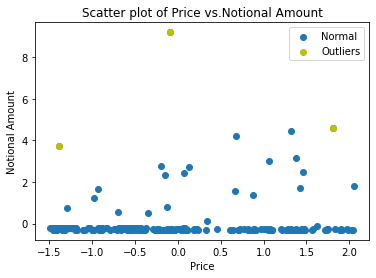

(array([ 40,  53,  71, 110, 167, 183, 195, 199, 205, 222, 229, 237],
      dtype=int64),)
12


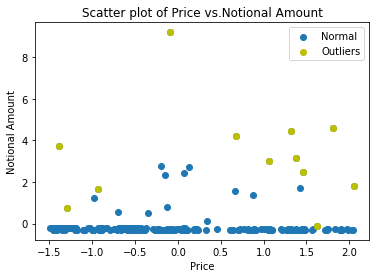

(array([102, 160, 327, 375, 389], dtype=int64),)
5


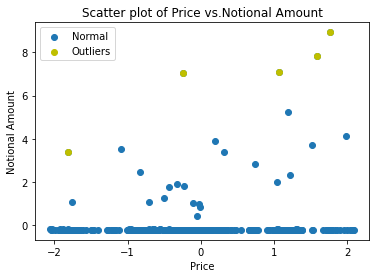

(array([ 18,  56,  83, 102, 118, 122, 139, 155, 160, 195, 236, 255, 273,
       291, 327, 329, 340, 345, 375, 389, 403], dtype=int64),)
21


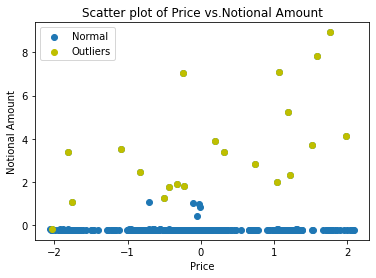

(array([145, 185, 369, 448, 495], dtype=int64),)
5


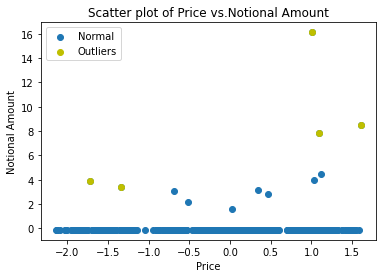

(array([ 14,  65,  93, 107, 135, 145, 153, 164, 165, 175, 185, 187, 212,
       218, 238, 239, 262, 291, 341, 369, 381, 403, 412, 448, 495],
      dtype=int64),)
25


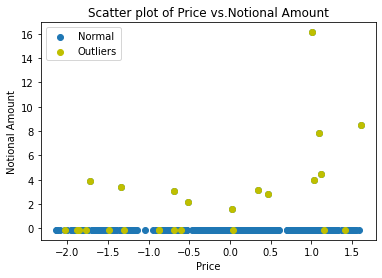

(array([ 37, 216, 303, 352, 441], dtype=int64),)
5


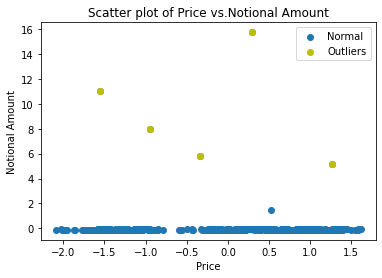

(array([ 37,  59,  60, 113, 114, 115, 119, 120, 121, 123, 216, 292, 303,
       333, 352, 354, 372, 375, 376, 377, 378, 379, 441, 442, 487],
      dtype=int64),)
25


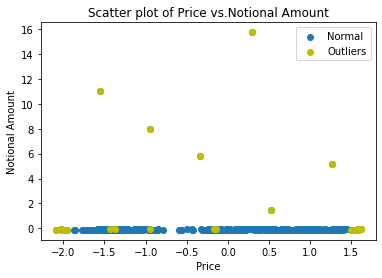

In [270]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bloomberg.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:

        IF = IsolationForest(n_estimators=100, contamination=i)
        predictions = IF.fit_predict(df)

        outlier_index = where(predictions==-1)
        print(outlier_index)
        print(len(outlier_index[0]))
        values = df[outlier_index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='y',label="Outliers")
        plt.xlabel("Price")
        plt.ylabel("Notional Amount")
        plt.title('Scatter plot of Price vs.Notional Amount')
        plt.legend()
        plt.show()

(array([2], dtype=int64),)
1


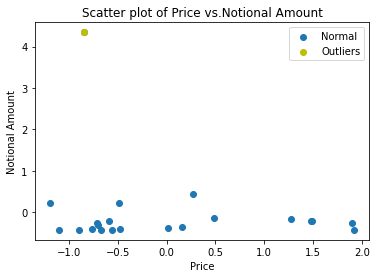

(array([2], dtype=int64),)
1


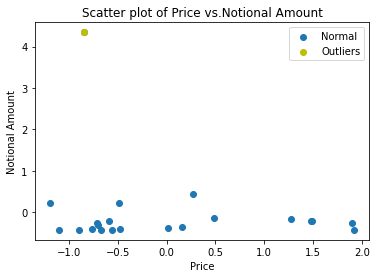

(array([28], dtype=int64),)
1


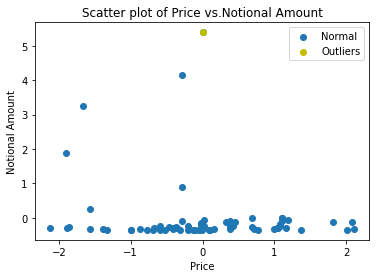

(array([ 8, 10, 23, 28], dtype=int64),)
4


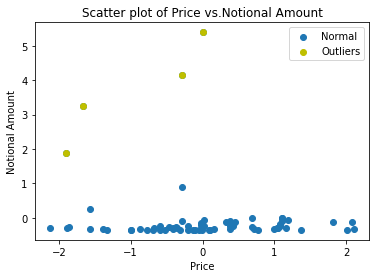

(array([13], dtype=int64),)
1


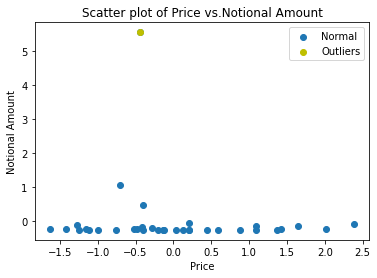

(array([13, 30], dtype=int64),)
2


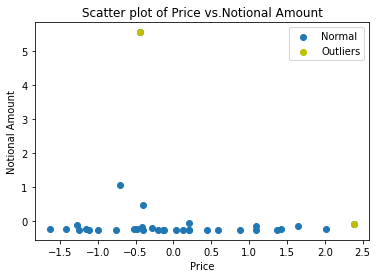

(array([  8, 178, 236, 266], dtype=int64),)
4


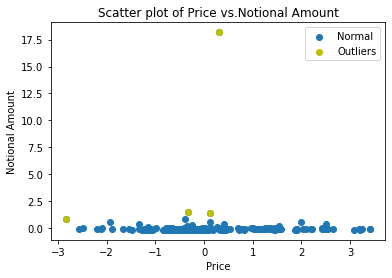

(array([  1,   8,   9,  11,  14,  18, 178, 236, 266, 313, 316, 322, 324,
       325, 326, 327, 334], dtype=int64),)
17


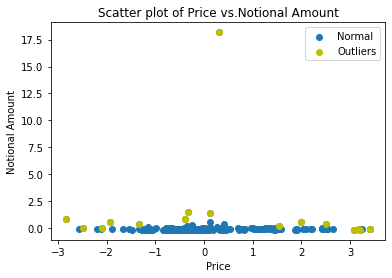

In [271]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_bondvision.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:

        IF = IsolationForest(n_estimators=100, contamination=i)
        predictions = IF.fit_predict(df)

        outlier_index = where(predictions==-1)
        print(outlier_index)
        print(len(outlier_index[0]))
        values = df[outlier_index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='y',label="Outliers")
        plt.xlabel("Price")
        plt.ylabel("Notional Amount")
        plt.title('Scatter plot of Price vs.Notional Amount')
        plt.legend()
        plt.show()

(array([ 68,  73, 135, 488], dtype=int64),)
4


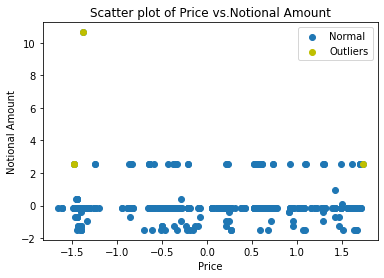

(array([ 51,  52,  68,  73, 135, 165, 413, 420, 421, 422, 431, 435, 442,
       444, 455, 459, 470, 482, 483, 486, 487, 488, 489, 494, 495],
      dtype=int64),)
25


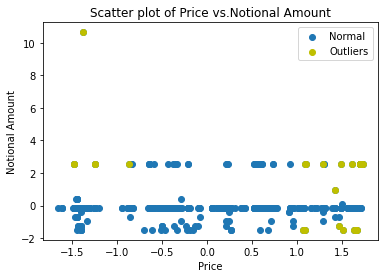

(array([20, 74, 75, 80], dtype=int64),)
4


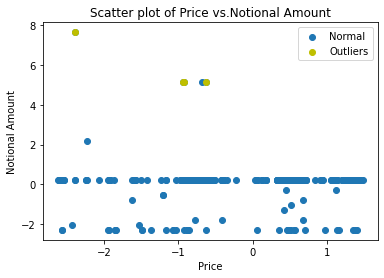

(array([  0,   8,  20,  24,  26,  27,  40,  74,  75,  80,  84, 137, 216,
       218, 238, 243, 272, 273, 348, 382], dtype=int64),)
20


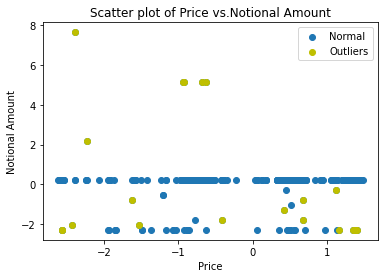

(array([5], dtype=int64),)
1


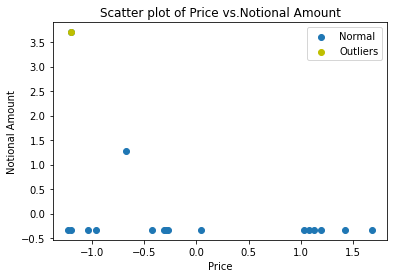

(array([5], dtype=int64),)
1


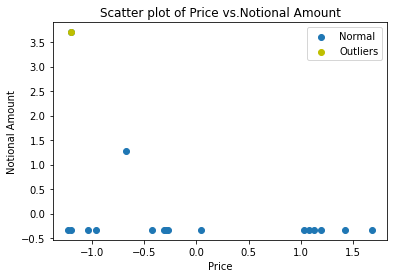

(array([11, 50], dtype=int64),)
2


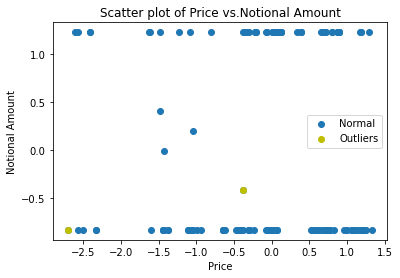

(array([ 3, 11, 13, 14, 20, 23, 50, 97], dtype=int64),)
8


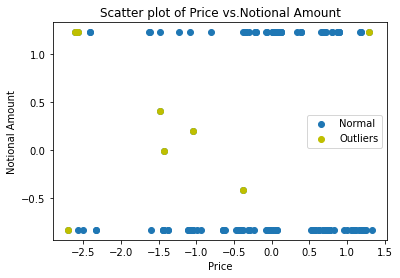

In [272]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_mts.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:

        IF = IsolationForest(n_estimators=100, contamination=i)
        predictions = IF.fit_predict(df)

        outlier_index = where(predictions==-1)
        print(outlier_index)
        print(len(outlier_index[0]))
        values = df[outlier_index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='y',label="Outliers")
        plt.xlabel("Price")
        plt.ylabel("Notional Amount")
        plt.title('Scatter plot of Price vs.Notional Amount')
        plt.legend()
        plt.show()

(array([ 31,  53, 190, 241], dtype=int64),)
4


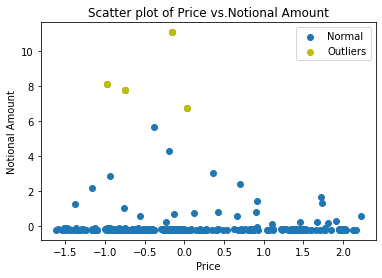

(array([ 10,  31,  53, 111, 125, 142, 153, 160, 190, 199, 241, 266, 282,
       312, 313, 327, 328, 331, 338, 385], dtype=int64),)
20


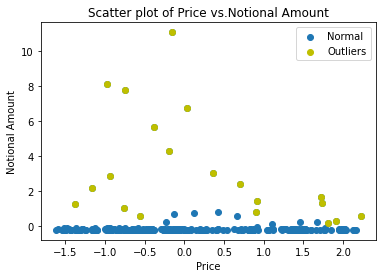

(array([ 66, 125, 291, 407, 468], dtype=int64),)
5


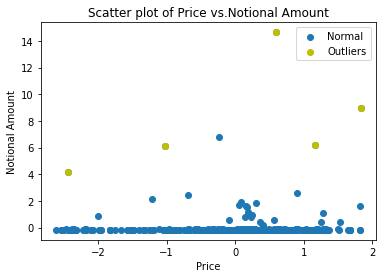

(array([ 44,  66, 103, 121, 125, 134, 135, 142, 145, 150, 171, 202, 214,
       267, 284, 287, 291, 338, 373, 407, 410, 468, 470, 473, 486],
      dtype=int64),)
25


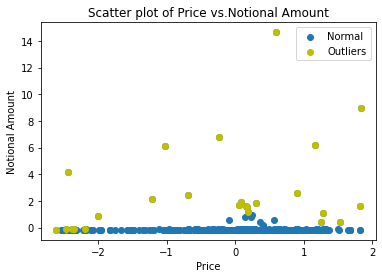

(array([199, 297, 410, 465, 490], dtype=int64),)
5


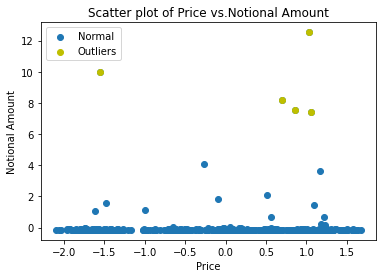

(array([ 14,  40,  89, 152, 190, 195, 199, 208, 222, 223, 234, 236, 237,
       247, 269, 297, 336, 365, 370, 382, 383, 410, 465, 474, 490],
      dtype=int64),)
25


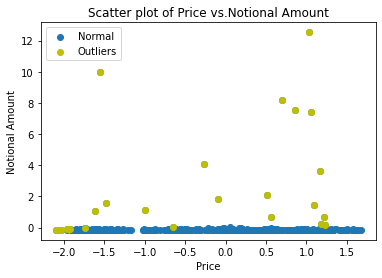

(array([104, 207, 251, 299, 365], dtype=int64),)
5


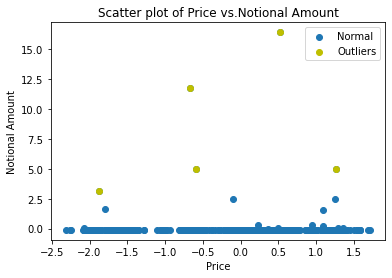

(array([ 18,  62, 104, 164, 201, 207, 223, 224, 225, 242, 243, 249, 251,
       299, 365, 393, 400, 413, 422, 426, 432, 442, 443, 464, 467],
      dtype=int64),)
25


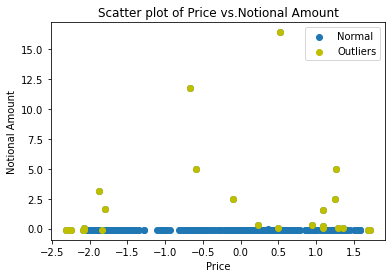

In [273]:
df_run = []
for i in range(1,5):
    df_run.append(pd.read_csv('{}_tradeweb.csv'.format(i)))
for df in df_run:
    df = pd.DataFrame(df,columns=['Historical Rts2 Price','Historical Rts2 Notional Amount'])
    df = df.dropna()
    df = df.to_numpy()
    ss = StandardScaler()
#dff=ss.fit_transform(df)
    
    df = ss.fit_transform(df)
    
    for i in [0.01,0.05]:

        IF = IsolationForest(n_estimators=100, contamination=i)
        predictions = IF.fit_predict(df)

        outlier_index = where(predictions==-1)
        print(outlier_index)
        print(len(outlier_index[0]))
        values = df[outlier_index]
        plt.scatter(df[:,0], df[:,1],label="Normal")
        plt.scatter(values[:,0], values[:,1], color='y',label="Outliers")
        plt.xlabel("Price")
        plt.ylabel("Notional Amount")
        plt.title('Scatter plot of Price vs.Notional Amount')
        plt.legend()
        plt.show()